In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.applications.efficientnet import EfficientNetB0

In [6]:
test_data_dir = "preprocessed/test"

In [7]:
# Set image size for resizing
img_width, img_height = 224, 224

batch_size = 64

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                 target_size=(img_width, img_height),
                                                 batch_size=batch_size,
                                                 class_mode='binary')

Found 6300 images belonging to 2 classes.


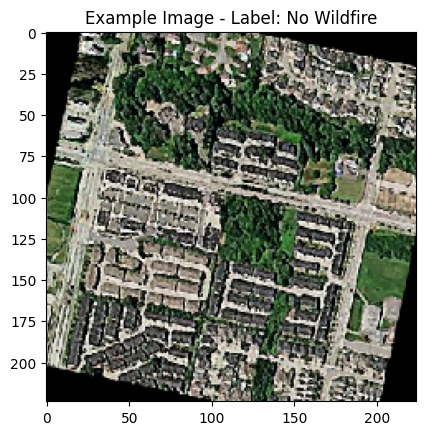

In [9]:
example_batch = next(test_generator)

# Extract the first image and label from the batch
example_image = example_batch[0][0]
example_label = example_batch[1][0]

if example_label == 1.0:
    label = "Wildfire"
else:
    label = "No Wildfire"

# Display the example image and label
plt.imshow(example_image)
plt.title(f"Example Image - Label: {label}")
plt.show()

In [10]:
def get_prediction(model_name, image):
    if model_name == "DenseNet201":
        base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        # Add custom classification layers
        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(512, activation='relu')(x)
        predictions = Dense(1, activation='sigmoid')(x)  # number of classes
        # Create the model
        model = Model(inputs=base_model.input, outputs=predictions)
        model.load_weights('best_model_densenet201.h5')
        
    elif model_name == "EfficientNetB0":

        inputs = keras.Input(shape=(224, 224, 3))
        baseModel = EfficientNetB0(weights="imagenet", include_top=False, input_tensor=inputs)
        baseModel.trainable = False
        headModel = baseModel.output
        headModel = layers.GlobalAveragePooling2D()(headModel)
        headModel = layers.Dropout(0.2)(headModel)
        outputs = layers.Dense(1, activation="sigmoid")(headModel)
        model = Model(inputs, outputs)
        
        model.load_weights('best_model_efficientNetB0.h5')

    pred_prob = model.predict(image) 

    if pred_prob >= 0.5:
        prediction_result = "WildFire"
    else:
        prediction_result = "No WildFire"

    return pred_prob[0][0], prediction_result


In [11]:
import numpy as np

# Assuming img_data is your input image data with shape (224, 224, 3)
# Reshape it to add the batch dimension
img_data_batch = np.expand_dims(example_image, axis=0)

# Now img_data_batch has shape (1, 224, 224, 3), suitable for model input


In [12]:
prob, result = get_prediction("DenseNet201",img_data_batch)

print("The probability is ", prob)
print("The classification result is ", result)

1/1 [==============================] - 2s 2s/step
The probability is  6.792417e-05
The classification result is  No WildFire


In [13]:
get_prediction("EfficientNetB0",example_image)

16705208/16705208 [==============================] - 2s 0us/step


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'best_model_efficientNetB0.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)